### RMOTR FINAL PROJECT
##### STACKOVERFLOW 2018 SURVEY RESULT ANALYSIS

In [1]:
# Initiliaze Common Packages/Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from zipfile import ZipFile
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


import warnings
warnings.filterwarnings('ignore')

sns.set(rc={'figure.figsize': (14, 7)})

Using TensorFlow backend.


In [2]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

In [3]:
df_public = pd.read_csv('data/survey_results_public.csv')
df_schema = pd.read_csv('data/survey_results_schema.csv')

## Summary of the Dataset:
## The dataset contians answers to various questions asked to respondents who have used StackOverflow. 
## Questions include categories about the respondent (for example: Which country they're from, what race they are, what's their education background, etc.)
## Additional there are questions that dive in deeper into respondent's sentiment about career, and skills they use related to coding.
## there are also behavioral questions about the respondents which can help us understand who that person is.


In [4]:
df_public.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB


## Question 5

#### Which are the most popular programming languages? And which are the highest-paying ones?

In [5]:
df = pd.read_csv('data/survey_results_public.csv')

In [6]:
all_langs = df['LanguageWorkedWith'].str.split(';', expand=True).stack().unique()
all_langs

array(['JavaScript', 'Python', 'HTML', 'CSS', 'Bash/Shell', 'C#', 'SQL',
       'TypeScript', 'C', 'C++', 'Java', 'Matlab', 'R', 'Assembly',
       'CoffeeScript', 'Erlang', 'Go', 'Lua', 'Ruby', 'PHP', 'VB.NET',
       'Swift', 'Groovy', 'Kotlin', 'Objective-C', 'Scala', 'F#',
       'Haskell', 'Rust', 'Julia', 'VBA', 'Perl', 'Cobol',
       'Visual Basic 6', 'Delphi/Object Pascal', 'Hack', 'Clojure',
       'Ocaml'], dtype=object)

In [7]:
langtype_count = pd.Series([df.loc[:, 'LanguageWorkedWith'].str.contains(lang, regex=False).sum()
                           for lang in all_langs],
                          index=all_langs,
                          name='LangType_count')

langtype_count = langtype_count.sort_values(ascending=False)

langtype_count

C                       67063
Java                    64912
JavaScript              54686
HTML                    53628
CSS                     50979
SQL                     44670
Bash/Shell              31172
Python                  30359
C#                      26954
PHP                     24071
C++                     19872
TypeScript              13626
R                       13348
Ruby                     7911
Swift                    6310
Assembly                 5760
Go                       5532
Objective-C              5510
VB.NET                   5254
Matlab                   4564
VBA                      3810
Kotlin                   3508
Scala                    3420
Groovy                   3373
Perl                     3280
Visual Basic 6           3087
Lua                      2733
CoffeeScript             2603
Delphi/Object Pascal     2025
Haskell                  1961
Rust                     1857
F#                       1115
Clojure                  1032
Erlang    

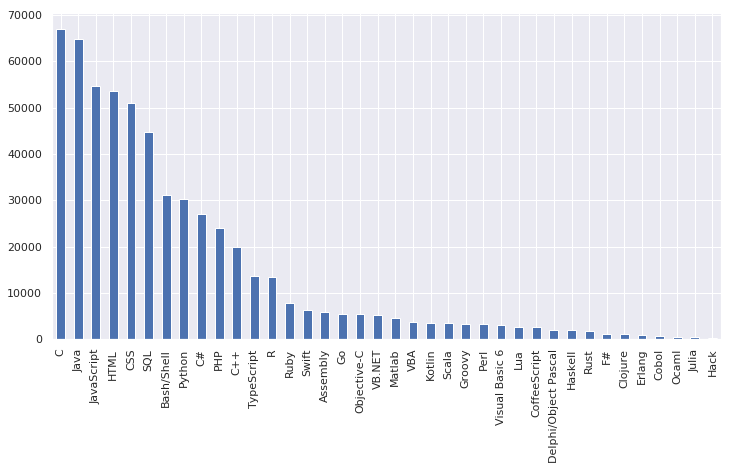

In [8]:
langtype_count.plot(kind='bar', figsize=(12, 6))

In [9]:
langtype_index = pd.Series([df.loc[:, 'LanguageWorkedWith'].str.contains(lang, regex=False)
                           for lang in all_langs],
                          index=all_langs,
                          name='LangType_count')

In [10]:
langtype_salary = pd.Series([df[langtype_index[i].fillna(False)]['ConvertedSalary'].median()
                            for i in np.arange(len(all_langs))],
                           index=all_langs,
                           name='LangType_ConvertedSalary')

langtype_salary = langtype_salary.sort_values(ascending=False)

langtype_salary

Clojure                 82904.0
F#                      80366.5
Go                      75175.0
Hack                    75000.0
Groovy                  75000.0
Scala                   73906.0
Erlang                  73596.0
Perl                    73433.0
Ruby                    72696.0
Rust                    72230.0
CoffeeScript            70000.0
Ocaml                   70000.0
R                       68537.0
Bash/Shell              64866.0
Julia                   63642.0
Objective-C             62418.0
TypeScript              62412.0
Python                  60000.0
Lua                     59980.0
Swift                   59970.0
C#                      59000.0
Cobol                   58749.0
SQL                     56400.0
JavaScript              56298.0
C                       55562.0
Haskell                 55562.0
Java                    55075.0
Kotlin                  55075.0
VBA                     55000.0
CSS                     55000.0
HTML                    55000.0
VB.NET  

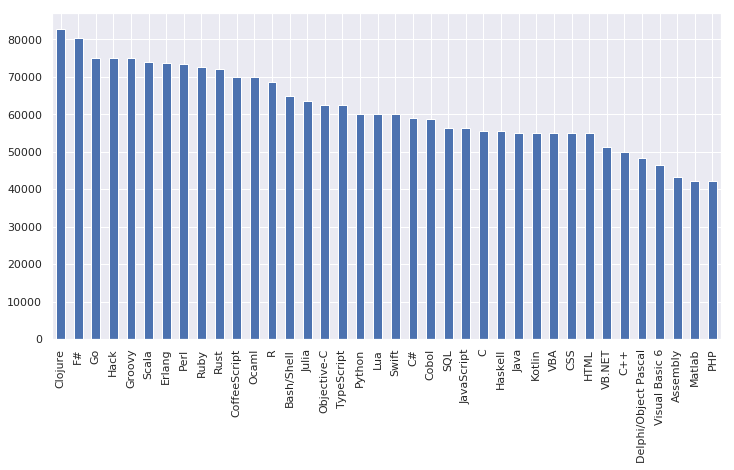

In [11]:
langtype_salary.plot(kind='bar', figsize=(12, 6))

## Question 6
#### Are the best paid jobs the most satisfying?

In [12]:
q_df = df_public.loc[:,[
      'ConvertedSalary'
    , 'JobSatisfaction'
    , 'CareerSatisfaction'
]]

In [13]:
q_df.head()

,ConvertedSalary,JobSatisfaction,CareerSatisfaction
0,NaN,Extremely satisfied,Extremely satisfied
1,70841.0,Moderately dissatisfied,Neither satisfied nor dissatisfied
2,NaN,Moderately satisfied,Moderately satisfied
3,NaN,Neither satisfied nor dissatisfied,Slightly dissatisfied
4,21426.0,Slightly satisfied,Moderately satisfied


In [14]:
q_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Data columns (total 3 columns):
ConvertedSalary       47702 non-null float64
JobSatisfaction       69276 non-null object
CareerSatisfaction    76504 non-null object
dtypes: float64(1), object(2)
memory usage: 2.3+ MB


In [ ]:
q_df.dropna(inplace=True)

In [15]:
for col in q_df.columns:
    print('Column: {} | Values: {}'.format(col, q_df[col].unique()))

Column: ConvertedSalary | Values: [    nan  70841.  21426. ...  11244. 269076.   1584.]
Column: JobSatisfaction | Values: ['Extremely satisfied' 'Moderately dissatisfied' 'Moderately satisfied'
 'Neither satisfied nor dissatisfied' 'Slightly satisfied' nan
 'Slightly dissatisfied' 'Extremely dissatisfied']
Column: CareerSatisfaction | Values: ['Extremely satisfied' 'Neither satisfied nor dissatisfied'
 'Moderately satisfied' 'Slightly dissatisfied' 'Slightly satisfied' nan
 'Moderately dissatisfied' 'Extremely dissatisfied']


In [16]:
q1 = q_df['ConvertedSalary'].quantile(0.25)
q3 = q_df['ConvertedSalary'].quantile(0.75)
IQR = q3 - q1
print(q1, q3, IQR)

23844.0 93000.0 69156.0


#### REMOVE ROWS WITH OUTLIER SALARIES

In [17]:
ub = q_df['ConvertedSalary'] <= (q3 + (1.5 * IQR))

q_df = q_df[ub]

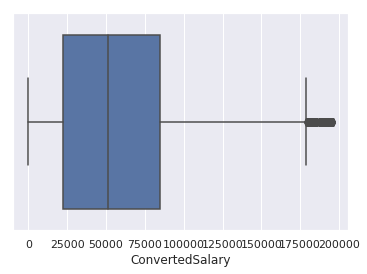

In [18]:
sns.boxplot(q_df['ConvertedSalary'])

#### Create Categories

In [19]:
q_df['JobSatisfaction'] = q_df['JobSatisfaction'].astype(CategoricalDtype([
    'Extremely dissatisfied',
    'Moderately dissatisfied',
    'Slightly dissatisfied', 
    'Neither satisfied nor dissatisfied',
    'Slightly satisfied',
    'Moderately satisfied',
    'Extremely satisfied'    
], ordered=True))

In [20]:
q_df['CareerSatisfaction'] = q_df['CareerSatisfaction'].astype(CategoricalDtype([
    'Extremely dissatisfied',
    'Moderately dissatisfied',
    'Slightly dissatisfied', 
    'Neither satisfied nor dissatisfied',
    'Slightly satisfied',
    'Moderately satisfied',
    'Extremely satisfied'    
], ordered=True))

In [21]:
cat_columns = q_df.select_dtypes(['category']).columns
cat_columns

Index(['JobSatisfaction', 'CareerSatisfaction'], dtype='object')

In [22]:
q_df[cat_columns] = q_df[cat_columns].apply(lambda x: x.cat.codes)

In [23]:
q_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45069 entries, 1 to 89965
Data columns (total 3 columns):
ConvertedSalary       45069 non-null float64
JobSatisfaction       45069 non-null int8
CareerSatisfaction    45069 non-null int8
dtypes: float64(1), int8(2)
memory usage: 792.2 KB


In [24]:
q_df.head()

,ConvertedSalary,JobSatisfaction,CareerSatisfaction
1,70841.0,1,3
4,21426.0,4,5
5,41671.0,5,4
6,120000.0,4,5
14,0.0,3,1


In [25]:
for col in q_df.columns:
    print('Column: {} | Values: {}'.format(col, q_df[col].unique()))

Column: ConvertedSalary | Values: [70841. 21426. 41671. ...  1716. 11244.  1584.]
Column: JobSatisfaction | Values: [ 1  4  5  3  2  0 -1  6]
Column: CareerSatisfaction | Values: [ 3  5  4  1  2  6  0 -1]


In [26]:
q_df['SalaryBins'] = pd.qcut(q_df["ConvertedSalary"], 7, labels=False)

In [27]:
q_df.head()

,ConvertedSalary,JobSatisfaction,CareerSatisfaction,SalaryBins
1,70841.0,1,3,4
4,21426.0,4,5,1
5,41671.0,5,4,2
6,120000.0,4,5,6
14,0.0,3,1,0


### Examine some correlations

In [28]:
q_df.corr().round(3)

,ConvertedSalary,JobSatisfaction,CareerSatisfaction,SalaryBins
ConvertedSalary,1.000,0.202,0.208,0.954
JobSatisfaction,0.202,1.000,0.582,0.219
CareerSatisfaction,0.208,0.582,1.000,0.215
SalaryBins,0.954,0.219,0.215,1.000


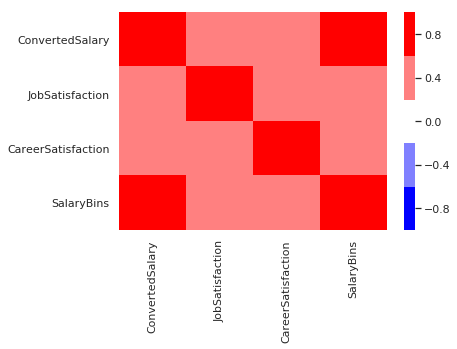

In [29]:
# correlation heatmap
cmap = plt.cm.get_cmap("bwr",lut=5) 

sns.heatmap(q_df.corr().values, vmin=-1., vmax=1.,
            cmap=cmap,
            xticklabels=list(q_df.columns),
            yticklabels=list(q_df.columns))

In [30]:
q_df['SalaryBins'].corr(q_df['JobSatisfaction'])

0.21933034319793188

In [31]:
q_df['SalaryBins'].corr(q_df['CareerSatisfaction'])

0.21537387407003206

In [32]:
q_df['JobSatisfaction'].corr(q_df['CareerSatisfaction'])

0.581703105019861

In [33]:
print(q_df.groupby('JobSatisfaction').mean())

                 ConvertedSalary  CareerSatisfaction  SalaryBins
JobSatisfaction                                                 
-1                  22453.964927            2.184339    1.136623
 0                  55810.177747            2.095871    2.821554
 1                  57344.537559            2.601697    2.975293
 2                  54462.133017            3.365628    2.850949
 3                  48341.308494            3.487645    2.503089
 4                  52139.414995            4.071851    2.714732
 5                  61817.318731            4.756918    3.206209
 6                  71897.960807            5.348625    3.646877


In [34]:
print(q_df.groupby('CareerSatisfaction').mean())

                    ConvertedSalary  JobSatisfaction  SalaryBins
CareerSatisfaction                                              
-1                     17038.363004        -1.000000    0.873435
 0                     47425.636651         1.287520    2.388626
 1                     48347.867612         1.787909    2.552178
 2                     49052.099118         2.523110    2.578680
 3                     42099.260049         2.747291    2.234883
 4                     52004.398074         3.691879    2.730394
 5                     64222.873809         4.403505    3.313478
 6                     68792.540835         5.007077    3.461949


In [35]:
print(q_df.groupby('SalaryBins').mean())

            ConvertedSalary  JobSatisfaction  CareerSatisfaction
SalaryBins                                                      
0               4978.354713         2.652586            3.463892
1              18122.288951         3.561453            3.827126
2              35161.371227         3.836985            4.032787
3              52142.906313         3.971460            4.196681
4              69109.141978         4.059631            4.328127
5              91746.204941         4.201989            4.493474
6             135478.235824         4.231785            4.650148
